# Lab 2: Seven Stages of Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import re
df = pd.read_csv('./data/AirIndia.csv')

In [14]:
df.columns = [re.sub(r'\W+', '_', col).strip('_') for col in df.columns]
print(df.columns.tolist())

['Month', 'DEPARTURES', 'HOURS', 'KILOMETER_TH', 'PASSENGERS_CARRIED', 'PASSENGER_KMS_PERFORMED_TH', 'AVAILABLE_SEAT_KILOMETRE_TH', 'PAX_LOAD_FACTOR', 'FY']


In [15]:
df = df.rename(columns={'PAX_LOAD_FACTOR_IN': 'PAX_LOAD_FACTOR'})

df['PAX_LOAD_FACTOR'] = pd.to_numeric(df['PAX_LOAD_FACTOR'], errors='coerce')
df['FY'] = df['FY'].astype(str)
df['Month'] = df['Month'].astype(str)

In [16]:
df_filtered = df[['Month', 'PASSENGERS_CARRIED', 'PAX_LOAD_FACTOR', 'FY']]

In [17]:
summary = df_filtered.groupby('FY').agg({
    'PASSENGERS_CARRIED': 'sum',
    'PAX_LOAD_FACTOR': 'mean'
}).reset_index()


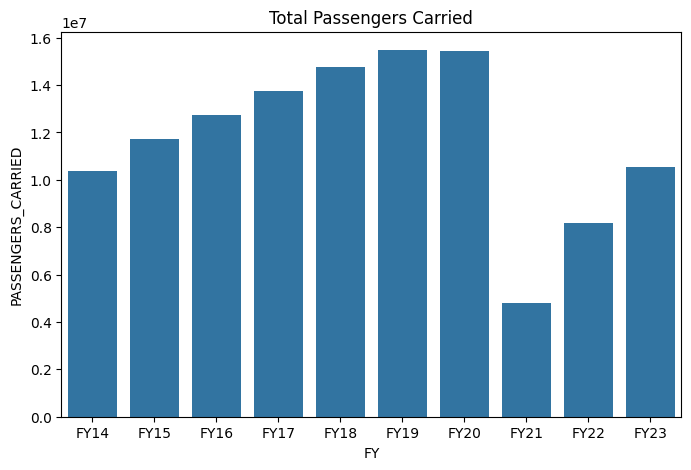

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='FY', y='PASSENGERS_CARRIED', data=summary)
plt.title('Total Passengers Carried')
plt.show()

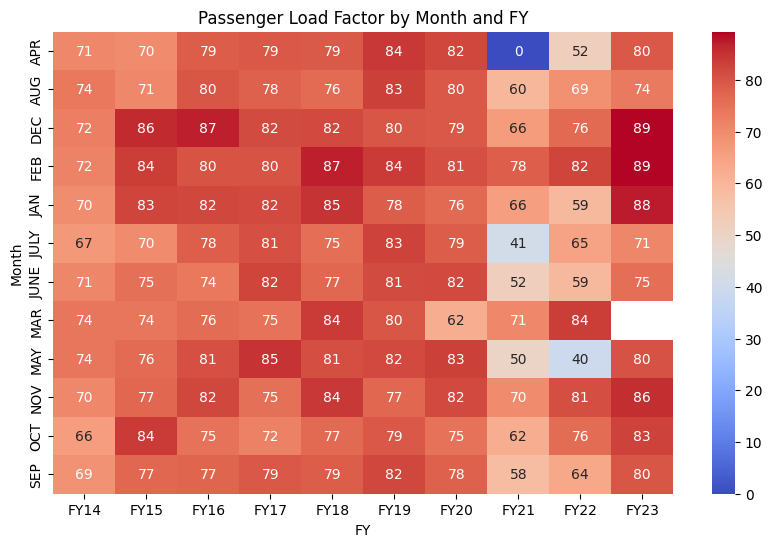

In [20]:
pivot = df.pivot(index='Month', columns='FY', values='PAX_LOAD_FACTOR')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Passenger Load Factor by Month and FY')
plt.show()

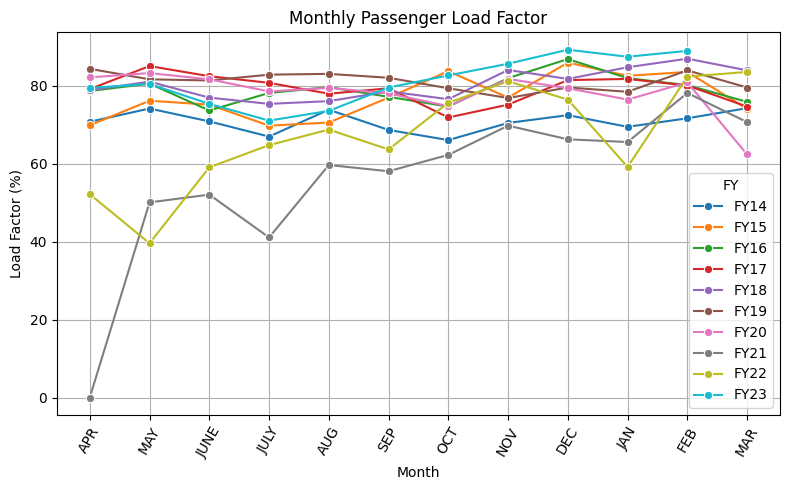

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Month', y='PAX_LOAD_FACTOR', hue='FY', marker='o')
plt.title('Monthly Passenger Load Factor')
plt.ylabel('Load Factor (%)')
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
@interact(FY=df['FY'].unique())
def plot_by_fy(FY='FY14'):
    subset = df[df['FY'] == FY]
    plt.figure(figsize=(8,5))
    sns.barplot(x='Month', y='PASSENGERS_CARRIED', data=subset)
    plt.title(f'Passengers Carried - {FY}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='FY', options=('FY14', 'FY15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY2…